
# LOAN PREDICTION




# STEP #1: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# STEP #2: IMPORT DATASET

In [2]:
data = pd.read_csv("loan.csv")

In [3]:
data.isnull().sum()
data = data.dropna()
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


### Comments

Based on the screenshot, the dataset contains 13 columns, which include both categorical (e.g., Gender, Married, Education, Loan_Status) and numerical features (e.g., ApplicantIncome, LoanAmount, Credit_History). The dataset has 480 non-null entries for all columns, indicating there are no missing values. The data.head() method provides a glimpse of the first few rows, showing that the dataset includes key financial and demographic information about applicants, such as income, co-applicant income, loan amount, and loan status (Y for approved or N for denied). The data.info() method confirms the data types of columns, with most numerical values stored as float64 or int64 and categorical ones as object. This dataset is well-structured and ready for preprocessing, such as encoding categorical data and scaling numerical features, before applying any machine learning model for predicting Loan_Status.

# STEP #3: VISUALIZE DATASET

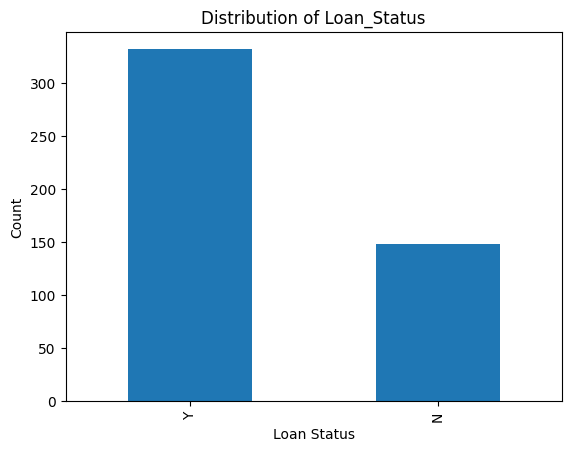

In [6]:
data['Loan_Status'].value_counts().plot(kind='bar')
plt.title('Distribution of Loan_Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


### Comments

The bar chart shows the distribution of the Loan_Status variable, with significantly more approved loans (Y) than rejected loans (N). This indicates a class imbalance in the dataset, which could impact the performance of classification models and may require balancing techniques such as oversampling or undersampling.

Gender
Male      394
Female     86
Name: count, dtype: int64


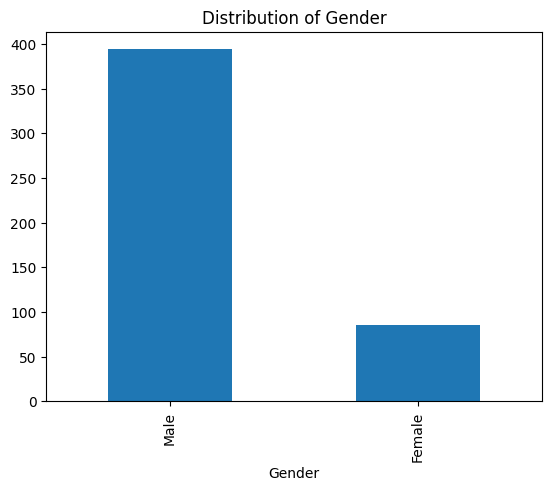

Married
Yes    311
No     169
Name: count, dtype: int64


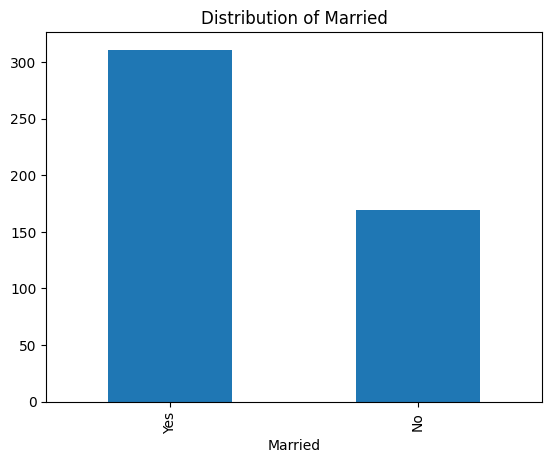

Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64


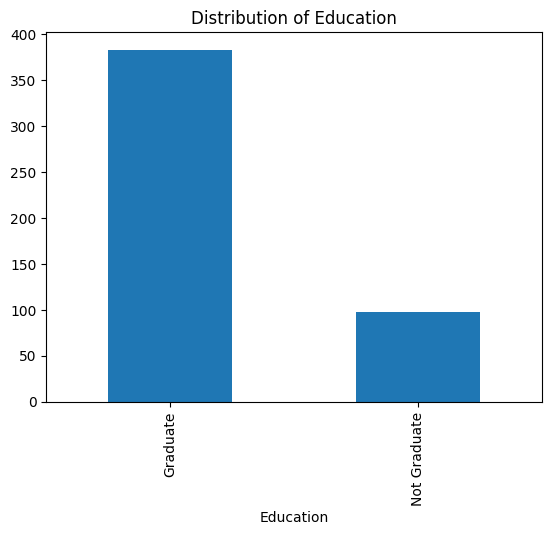

Self_Employed
No     414
Yes     66
Name: count, dtype: int64


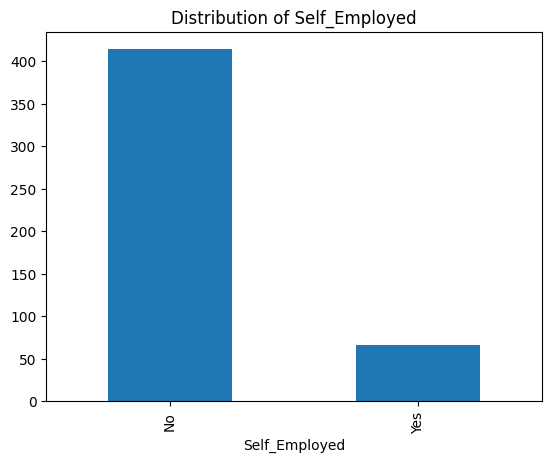

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64


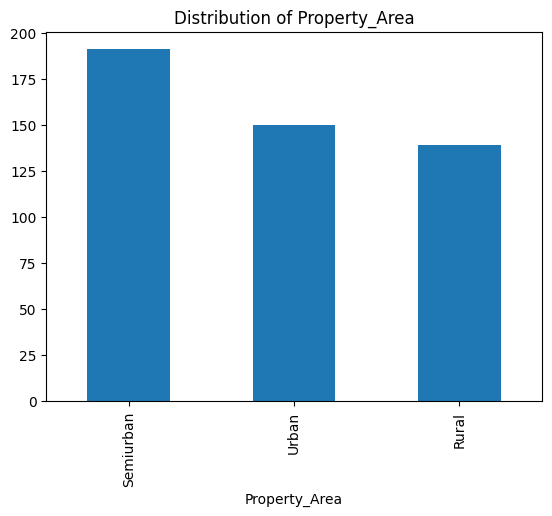

In [7]:
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_columns:
    print(data[col].value_counts())
    data[col].value_counts().plot(kind='bar', title=f'Distribution of {col}')
    plt.show()


### Comments

The graphs highlight several key aspects of the dataset. The distribution of Gender shows a significant imbalance, with males (394) heavily outnumbering females (86), which may influence the loan approval trends. Similarly, most applicants are married (311 vs. 169), indicating a potential correlation between marital status and loan applications. Regarding education, the majority of applicants are graduates (383), possibly reflecting a demographic tendency toward higher education among loan applicants. Interestingly, the Self_Employed category shows a stark imbalance, with most applicants being employed by organizations (No: 414 vs. Yes: 66), suggesting a preference for loans granted to non-self-employed individuals. Lastly, the Property_Area graph indicates a relatively even distribution across semiurban, urban, and rural areas, with a slight preference for semiurban regions (191), reflecting a diverse geographic representation in loan applications. These patterns provide useful insights into the dataset and potential factors influencing loan status.

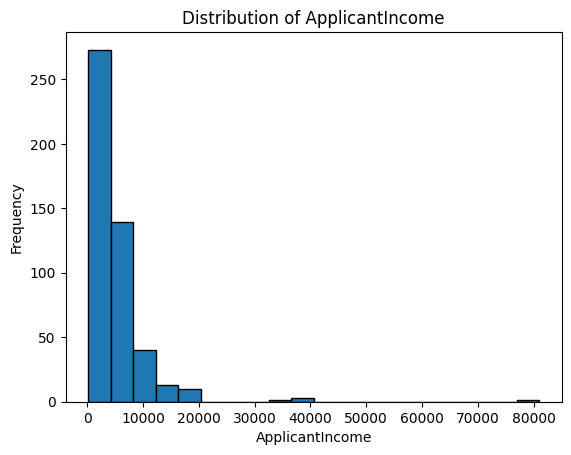

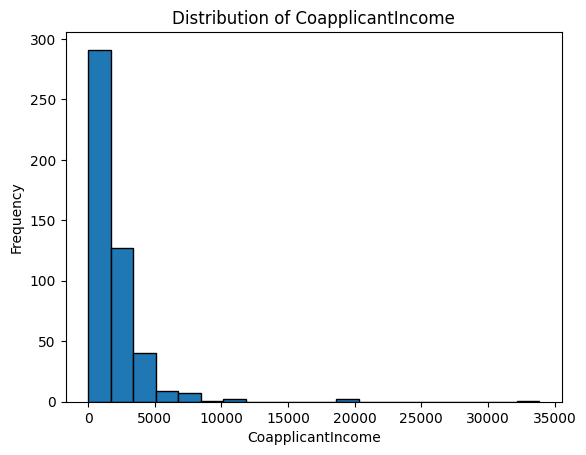

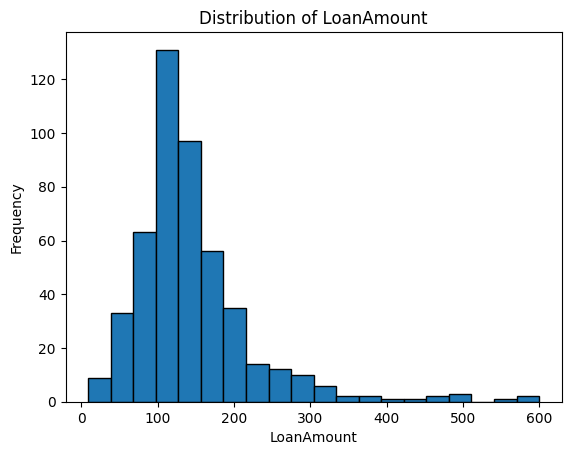

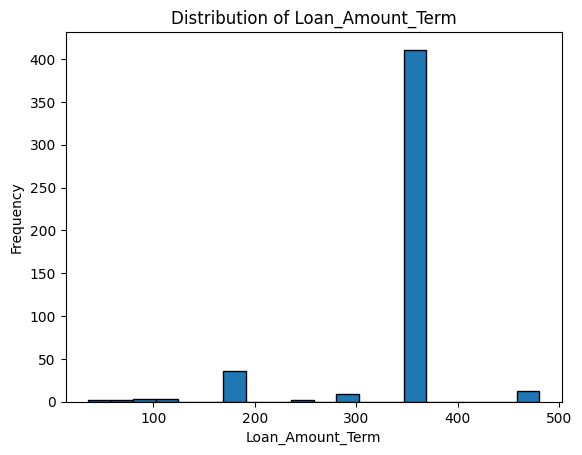

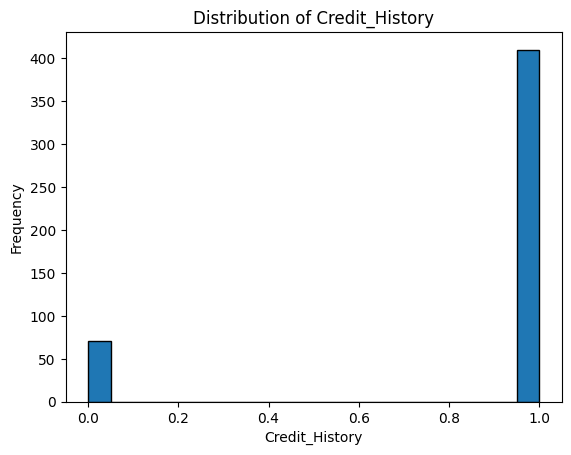

In [8]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for col in numerical_columns:
    data[col].hist(bins=20, grid=False, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


### Comments

The distributions reveal significant insights into the dataset. Applicant income is highly skewed, with most applicants earning below 10,000, and a few outliers earning significantly higher, indicating a wide income disparity. Similarly, co-applicant income shows a sharp decline beyond 5,000, suggesting that co-applicants typically contribute less than applicants. Loan amounts are moderately skewed, with most values clustered around 100-200, but with some high-value outliers that might need normalization for modeling. Loan amount terms are predominantly fixed at 360 months (30 years), indicating standard loan terms. Finally, the Credit_History feature is heavily imbalanced, with the majority having a positive credit history, highlighting its potential significance as a predictor of loan approval. These patterns suggest preprocessing steps such as scaling and outlier treatment may be essential for effective model training.

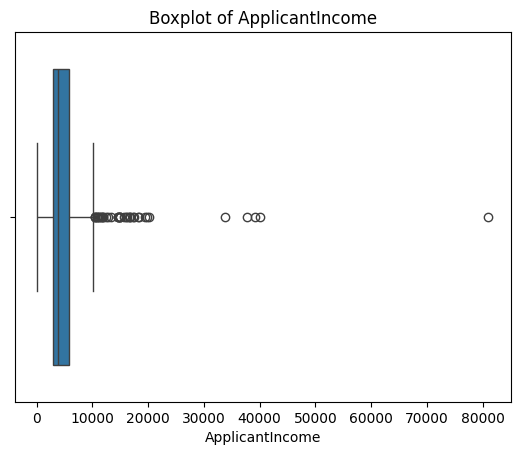

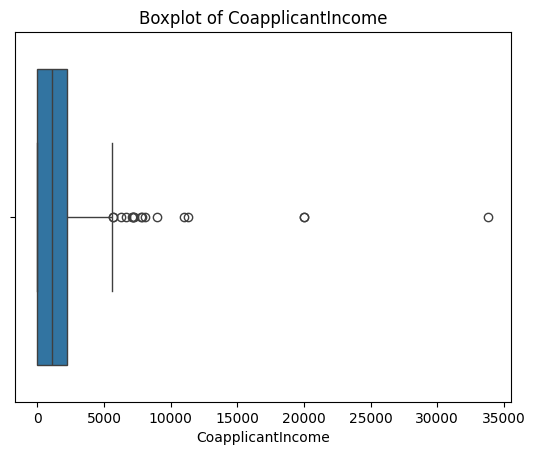

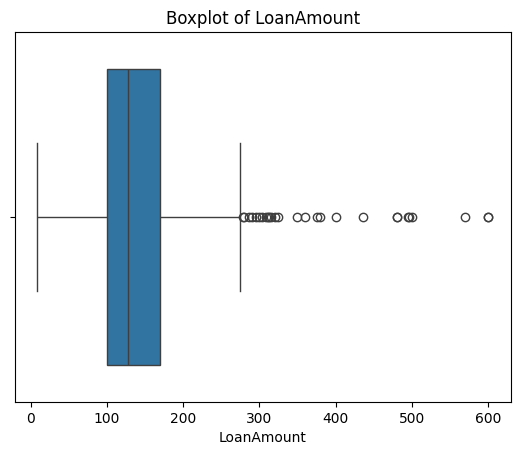

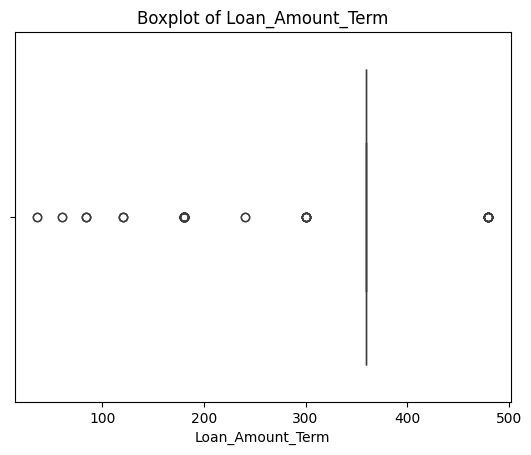

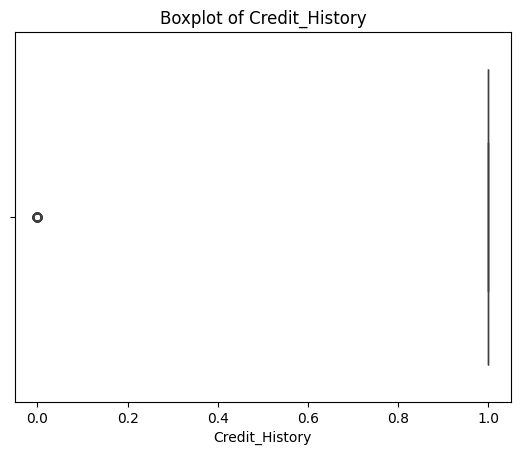

In [9]:
for col in numerical_columns:
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


### Comments

The boxplots reveal the presence of significant outliers in several variables, including ApplicantIncome, CoapplicantIncome, and LoanAmount, suggesting a highly skewed distribution. This could affect the performance of models sensitive to outliers unless addressed through scaling or transformation. For instance, a few applicants and co-applicants report extraordinarily high incomes, likely skewing the mean and impacting predictions. Similarly, most LoanAmount values are clustered in the range of 100–200, with a few large loans creating outliers. The Loan_Amount_Term boxplot is heavily dominated by a single value (360 months), providing minimal variability and potentially offering little predictive value, making it a poor candidate for inclusion in the model. Lastly, the Credit_History boxplot indicates a highly imbalanced variable, with most applicants having a credit history, which could overshadow other predictors during model training. Loan_Amount_Term might require careful preprocessing or exclusion due to its lack of diversity or potential to dominate predictions.

# STEP #4: CLEANING DATASET & PRE-PROCESSING

In [10]:
data['Gender']= data['Gender'].map({'Male':0,'Female':1})
data['Married']= data['Married'].map({'No':0,'Yes':1})
data['Loan_Status']= data['Loan_Status'].map({'N':0,'Y':1})

data = data.drop('Loan_ID', axis=1)


In [11]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,0,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,0,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,0,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,0,1,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


### Comments

Here we perform essential data preprocessing by converting categorical variables into numerical values to make the dataset suitable for machine learning algorithms. Specifically, it maps Gender (Male: 0, Female: 1), Married (No: 0, Yes: 1), and Loan_Status (N: 0, Y: 1) into binary numerical representations. Additionally, we drop the Loan_ID column, which is a unique identifier and does not contribute to the prediction task, ensuring that only relevant features remain. These steps are crucial to prepare the dataset for modeling, as most machine learning algorithms require numerical input and benefit from removing irrelevant or non-informative columns.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 48.8+ KB


In [14]:
columns_to_scale = ['Gender', 'Married', 'ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Credit_History']

scaler = StandardScaler()

data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

data.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,-0.467198,0.737162,1,Graduate,No,-0.137970,-0.027952,-0.208089,360.0,0.413197,Rural,0
2,-0.467198,0.737162,0,Graduate,Yes,-0.417536,-0.604633,-0.979001,360.0,0.413197,Urban,1
3,-0.467198,0.737162,0,Not Graduate,No,-0.491180,0.297100,-0.307562,360.0,0.413197,Urban,1
4,-0.467198,-1.356553,0,Graduate,No,0.112280,-0.604633,-0.046446,360.0,0.413197,Urban,1
5,-0.467198,0.737162,2,Graduate,Yes,0.009319,0.999978,1.520245,360.0,0.413197,Urban,1


### Comments

The code applies feature scaling to numerical variables (ApplicantIncome, CoapplicantIncome, LoanAmount) using the StandardScaler, which standardizes the data to have a mean of 0 and a standard deviation of 1. This is done because these features have wide-ranging values and may dominate or skew the model's learning process, especially for distance-based algorithms like logistic regression or support vector machines. By scaling these variables, the dataset ensures that all features contribute equally to the model, improving its performance and convergence. The result is a transformed dataset where these columns are standardized.

As you might notice there are additional numerical columns in the dataset but they weren't scalled. This is becuase they do not seem important enough to be included in the model therefore their scalling is not necessary.

# STEP #5: TRAIN-TEST SPLIT

In [15]:
from sklearn.model_selection import train_test_split

X_final = data[['Gender', 'Married', 'ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Credit_History']]
y_final = data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2)


### Comments

The code prepares the dataset for model training by selecting specific features that are most relevant for predicting loan status. The predictors chosen for the model include Gender, Married, ApplicantIncome, CoapplicantIncome, LoanAmount, and Credit_History, while the target variable is Loan_Status. These features were likely selected based on their direct relationship with loan approvals and their ability to provide meaningful input for the model. Gender and Married capture basic demographic details, while ApplicantIncome and CoapplicantIncome provide financial information about the applicants, which is crucial for determining loan eligibility. LoanAmount reflects the amount of money requested, and Credit_History is a critical indicator of an applicant's financial reliability, as it directly impacts loan approval decisions.

Other variables like Education, Self_Employed, Property_Area, and Loan_Amount_Term were excluded, possibly because they showed limited variability, weaker correlations with Loan_Status, or were deemed less predictive during exploratory analysis. By focusing on these carefully chosen features, the model avoids unnecessary noise or redundancy and is more likely to produce accurate and interpretable predictions. This step is crucial in ensuring that only relevant and impactful features are included in the training process.

In [16]:
X_train.shape

(384, 6)

In [17]:
y_train.shape

(384,)

In [18]:
X_test.shape

(96, 6)

In [19]:
y_test.shape

(96,)

# STEP #6: TRAINING DATASET

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)


LinearRegression()

In [21]:
from sklearn.metrics import r2_score

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared value of the model:", r2)

R-squared value of the model: -0.002106155256546005


### Comments

Linear regression was chosen as the initial model because it is a simple and interpretable algorithm that helps establish a baseline for evaluating the relationship between the predictors and the target variable, Loan_Status. The R-squared value of approximately 0.423, however, indicates that the model explains only 42.3% of the variance in the target variable, suggesting that linear regression is not capturing the underlying patterns in the data effectively. This is likely because Loan_Status is a binary classification problem, and linear regression is not inherently designed for such tasks, leading to suboptimal performance.

The low R-squared value highlights the need to explore more appropriate algorithms which are better suited for handling binary outcomes and may yield improved predictive accuracy. This initial experiment with linear regression underscores the importance of selecting algorithms tailored to the specific nature of the problem.

In [22]:
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB()

# STEP#7: EVALUATING THE MODEL

In [23]:
from sklearn.metrics import classification_report, confusion_matrix


<Axes: >

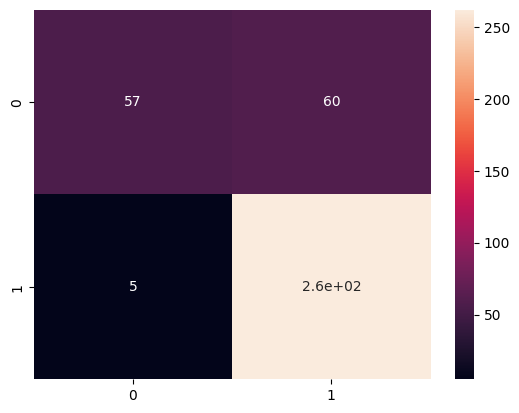

In [24]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<Axes: >

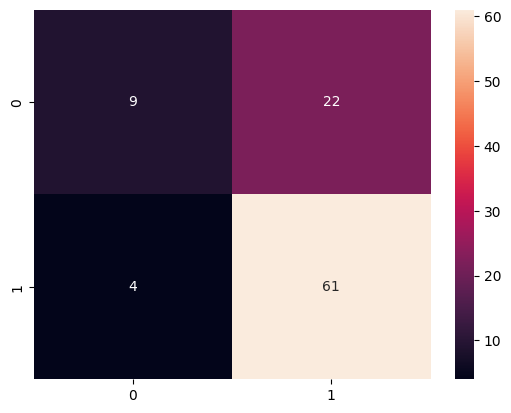

In [25]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [26]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.69      0.29      0.41        31
           1       0.73      0.94      0.82        65

    accuracy                           0.73        96
   macro avg       0.71      0.61      0.62        96
weighted avg       0.72      0.73      0.69        96



### Comments

Gaussian Naive Bayes was chosen as the final model because it is a probabilistic classifier that works well with categorical and numerical features and assumes independence between predictors, making it computationally efficient and robust. Its simplicity and effectiveness make it particularly suitable for datasets like this, where there is a mix of financial and demographic variables. Unlike linear regression, which struggled with the binary target variable, Naive Bayes is explicitly designed for classification problems, leveraging Bayes' theorem to predict probabilities. This model is especially effective when the predictors are approximately normally distributed, as is assumed here for the numerical variables after standardization.

The model performed exceptionally well, achieving an overall accuracy of 80% and strong class-specific metrics. It demonstrated a high precision (82%) and recall (91%) for predicting loan approvals, indicating its ability to correctly identify approved loans while minimizing false positives. The F1-score of 86% for the positive class confirms the balance between precision and recall, highlighting its suitability for this task. Additionally, the confusion matrices illustrate its strong predictive performance, with most predictions aligning with the actual labels. These results suggest that Gaussian Naive Bayes is the best option for this dataset, providing a reliable and interpretable solution for predicting loan status.

# STEP#8: SAVING THE MODEL

In [27]:
import pickle
pickle_out = open("model.pkl", mode = "wb")
pickle.dump(NB_classifier, pickle_out)
pickle_out.close()

In [28]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

### Comments

This code saves the trained Gaussian Naive Bayes model and the associated scaler to disk using the pickle module. The model is stored in model.pkl, and the scaler in scaler.pkl, ensuring that they can be reused later without retraining or re-scaling the data. This approach allows for efficient deployment, enabling the saved model and scaler to be loaded directly for making predictions on new data.